<center>
<img src=https://st2.depositphotos.com/3955303/5656/i/450/depositphotos_56566631-stock-photo-abalone-shell.jpg alt="Abalone" style="width:400px;">


# <center> **Regression with an Abalone Dataset**
### <center> Playground Series - Season 4, Episode 4


**Project Goal:** The goal of this project is to predict the age of abalone from various physical measurements.   
**Data Source:** <a href=(https://www.kaggle.com/competitions/playground-series-s4e4/overview >Kaggle Playground</a>

#### <center> **Plan:**
1. Data evaluation and treatment
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Building
5. Model Deployment

In [11]:
# Importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from scipy.stats import kruskal


#### <center> 1. Data evaluation and treatment

1.1. Checking state of files and information provided:

In [12]:
# Reading files:
train_df = pd.read_csv('data/playground-series-s4e4/train.csv')
display(train_df.head(5))
# Checking main parameters of training data:
print(train_df.info())

test_df = pd.read_csv('data/playground-series-s4e4/test.csv')
display(test_df.head(5))
# Checking main parameters of training data:
print(test_df.info())

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
None


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB
None


*Intermediary Conclusions 1.1:* 
* Both files can be opened and read. Training dataset contains 10 columns (id, Sex,Length, Diameter, Height, Whole weight, Whole weight.1, Whole weight.2, Shell weight, Rings). Test dataset contains same data except for the Rings column that is to be populated based on ML prediction. The volume of provided training data is sufficient to build an efficient ML model. 
* Id and row index are identical.    
* All columns except Sex have numeric data type. Sex has an object data type that needs to be transformed to optimize ML modelling.

*Intermediary Conclusions 1.1:* 
* Both files can be opened and read. Training dataset contains 10 columns (id, Sex,Length, Diameter, Height, Whole weight, Whole weight.1, Whole weight.2, Shell weight, Rings). Test dataset contains same data except for the Rings column that is to be populated based on ML prediction. The volume of provided training data is sufficient to build an efficient ML model. 
* Id and row index are identical.    
* All columns except Sex have numeric data type. Sex has an object data type that will have to be transformed for ML modelling

1.2 Checking data integrity:

In [13]:
# Checking data for missing values:
print('Train data. Number of missing values in each column:') 
print(train_df.isnull().sum())
print()
print("------------------------------------------------------")
print()
print('Test data. Number of missing values in each column:') 
print(test_df.isnull().sum())

Train data. Number of missing values in each column:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

------------------------------------------------------

Test data. Number of missing values in each column:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


In [14]:
# Checking train data for duplicates:
train_duplicate_count = train_df.iloc[:, 2:].duplicated().sum()
pct_train_duplicates = (train_duplicate_count / len(train_df)) * 100

# Checking test data for duplicates:
test_duplicate_count = test_df.iloc[:, 2:].duplicated().sum()
pct_test_duplicates = (test_duplicate_count / len(test_df)) * 100

print(f'Train data. Number of duplicate rows (excluding the row index and identifier): {train_duplicate_count} ({pct_train_duplicates:.2f}%)')
print()
print(f'Test data. Number of duplicate rows (excluding the row index and identifier): {test_duplicate_count} ({pct_test_duplicates:.2f}%)')

Train data. Number of duplicate rows (excluding the row index and identifier): 21 (0.02%)

Test data. Number of duplicate rows (excluding the row index and identifier): 30 (0.05%)


*Intermediary Conclusions 1.2:* 
* Both datasets are free from missing values. 
* Both datasets contain duplicate rows, but their number is insignificant (train data - 0.02%, test data - 0.03%).    
* The datasets can be used in their current form, no transformation or optimisation is necessary.

#### *Intermediary Conclusions 1:*
* Files containing datasets are in correct, readable condition.
* The datasets are of high quality, without missing values and contain an insignificant number of duplicate values that will not affect the prediction precision in any major way.


#### <center> 2. Exploratory Data Analysis


In [15]:
# making a deep copy of the training dataset in order to preserve it from unnecessary transformations:
t_df = copy.deepcopy(train_df) 

2.1 General description of training dataset:

In [16]:
t_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


*Intermediary Conclusions 2.1:* 

**Length, Diameter, and Height:**
* The median values are close to the mean values, indicating symmetric distributions.           
* The standard deviations are relatively small compared to the means, suggesting that the data points are clustered closely around the mean.            
* The minimum and maximum values indicate a range from small to large values.       

**Whole weight, Shell weight, and Rings:**
* The median values are close to the mean values, indicating symmetric distributions.       
* The standard deviations are moderate, suggesting some variability in the data.        
* The minimum and maximum values indicate a wide range of values, especially for Rings.     

2.2 Testing for correlation between the features 'Sex' and 'Rings':   

* Observed characteristics of the features:     
    1) Feature 'Sex' is categorical, feature 'Rings' is continuous;     
    2) Feature 'Rings' has significantly important outliers.
* Based on the described characteristics of the features Kruskal-Wallis test is chosen. It will be used to determine if there are statistically significant differences in the mean 'Rings' values across the categories of 'Sex'.
* Used test is a two-sided test with hypotheses  formulated in following way:
    *H0:* Median 'Rings' values are equal across all categories of 'Sex'.
    *H1:* At least one group has a different median 'Rings' value compared to the others.

In [17]:
# Extract 'Rings' values for each category of 'Sex'
grouped_data = [t_df[t_df['Sex'] == category]['Rings'] for category in ['M', 'F', 'I']]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_data)

# Print the H-statistic and p-value
print("H-statistic:", h_statistic)
print("p-value:", p_value)

H-statistic: 35204.203498008435
p-value: 0.0


*Intermediary Conclusions 2.2:* 
* The H-statistic is quite large (35204), indicating substantial differences between the ranked sums of observations in each group.
* The p-value = (0.0). This means that there are statistically significant differences in the median 'Rings' values across the categories of 'Sex'.
* Based on this test we can reject the null hypothesis and conclude that there are statistically significant differences in the median 'Rings' values between at least two categories of 'Sex'.

2.3 Testing linear correlation (Pearson's correlation) between different features

<AxesSubplot:>

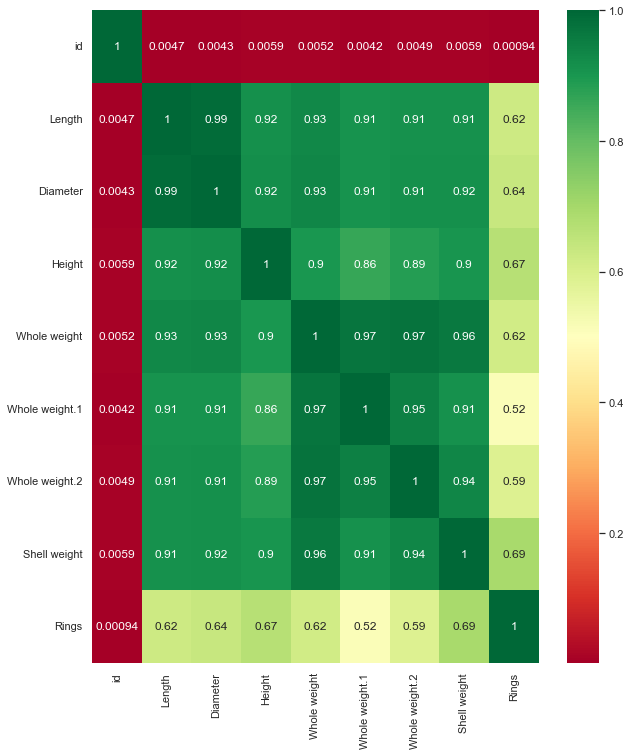

In [18]:
sns.set(rc={'figure.figsize':(10,12)}) 
sns.heatmap(t_df.corr(),annot=True, cmap='RdYlGn')

2.4 Investigating relation of 'Rings' to other features

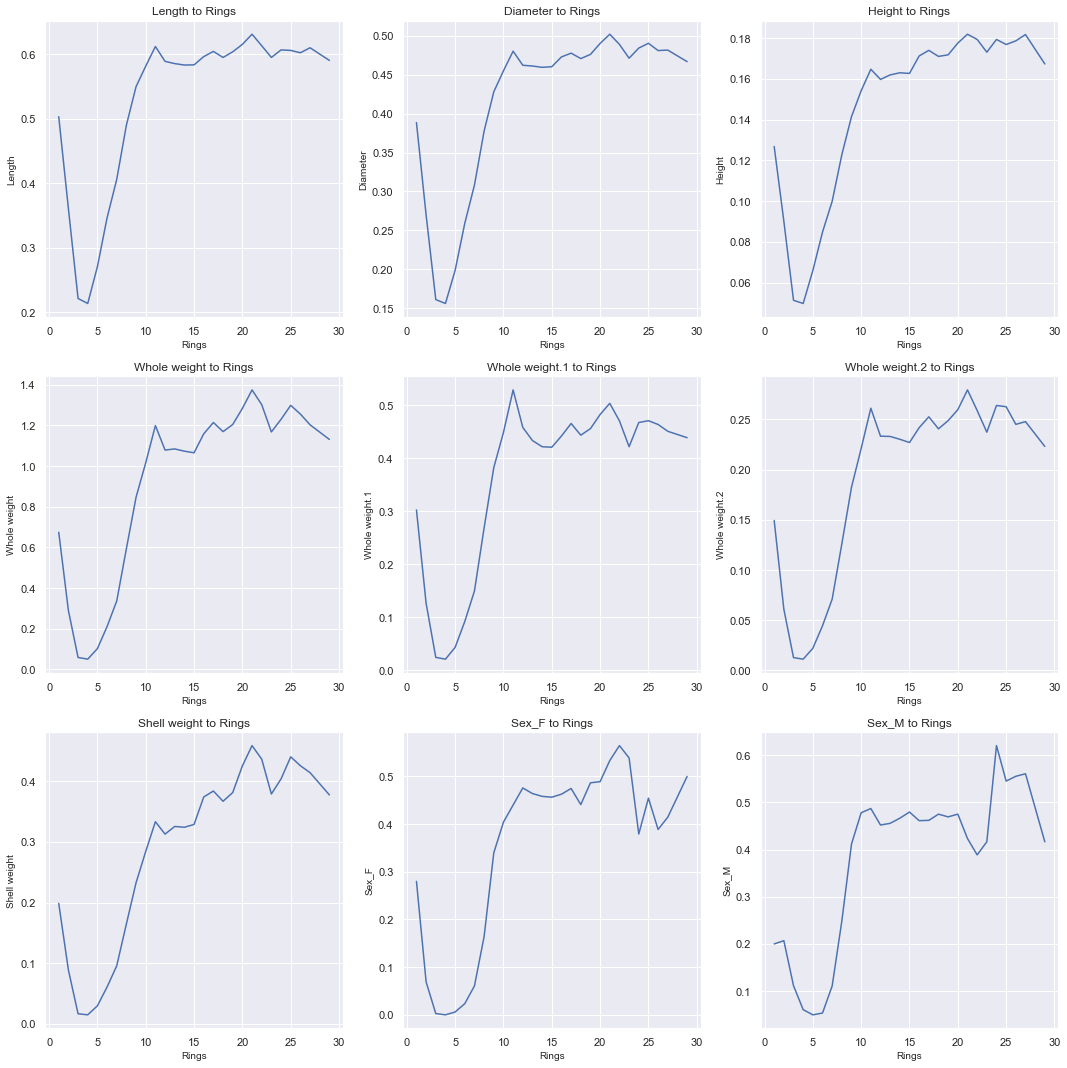

In [21]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Loop through each feature and plot
for i, feature in enumerate(t_df.columns):
    if feature != 'Rings' and feature != 'id':  # Skip 'Rings' column
        row_idx = i // 3  # Calculate row index
        col_idx = i % 3  # Calculate column index
        ax = axes[row_idx][col_idx]  # Get the appropriate axis for the subplot
        sns.lineplot(data=t_df, x='Rings', y=feature, ci = None, ax=ax)  # Plot the data
        ax.set_title(f'{feature} to Rings', fontsize=12)  # Set title
        ax.set_xlabel('Rings', fontsize=10)  # Set x-axis label
        ax.set_ylabel(feature, fontsize=10)  # Set y-axis label
 
# Adjust layout
plt.tight_layout()
plt.show()


#### <center> 3. Feature Engineering

3.1 Performing one-hot encoding on the "Sex" column:

In [20]:
t_encoded = pd.get_dummies(train_df['Sex'],prefix="Sex", prefix_sep='_', dtype=int)
t_encoded.drop(columns=['Sex_I'], inplace=True)
t_df = t_df.merge(t_encoded, left_index=True, right_index=True)
t_df.drop(columns=['Sex'], inplace=True)
t_df = t_df[['Length','Diameter','Height','Whole weight','Whole weight.1','Whole weight.2','Shell weight','Sex_F','Sex_M','Rings']]

t_df

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_M,Rings
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,1,0,11
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,1,0,11
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0,0,6
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0,1,10
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0,0,9
...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,0,1,6
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,0,1,9
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0,0,6
90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,0,0,6
